In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# HIERARCHIAL CLUSTERING

In [2]:
# Load the data set 'crime_data.csv'
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.rename({'Unnamed: 0':'State'}, axis = 1,inplace = True)

In [5]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.shape

(50, 5)

# EDA ON DATA SET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.duplicated().sum()

0

# No null and duplicated values in the data set

In [9]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


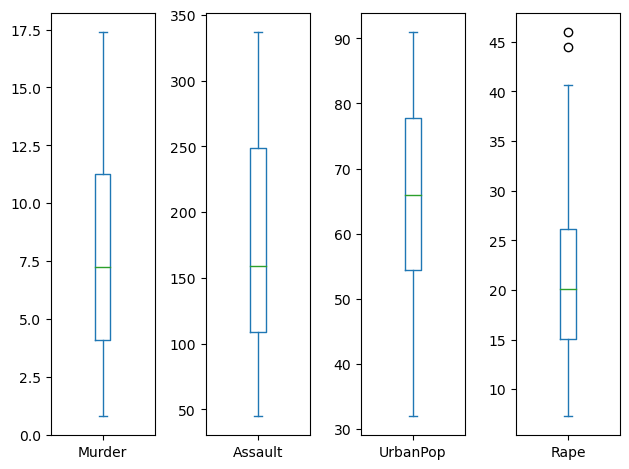

In [10]:
# univariate analysis of the data by box plot
df.plot(kind = 'box',subplots = True)
plt.tight_layout()

In [12]:
# Correlation between the numeric features
corel = df.corr()
corel

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# from the above, we can say that the correalation between Murder and Assault is slightly high

In [13]:
# scale the numeric features of the dataset using minmax scaler. exclude the State feature
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df_scaled = mm_scaler.fit_transform(df.iloc[:,1:])

In [14]:
# create a dataframe of the scaled features
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[1:])
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [15]:
df_scaled.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


# From the above , Min = 0 and Max = 1 , Min max scaling applied on the data

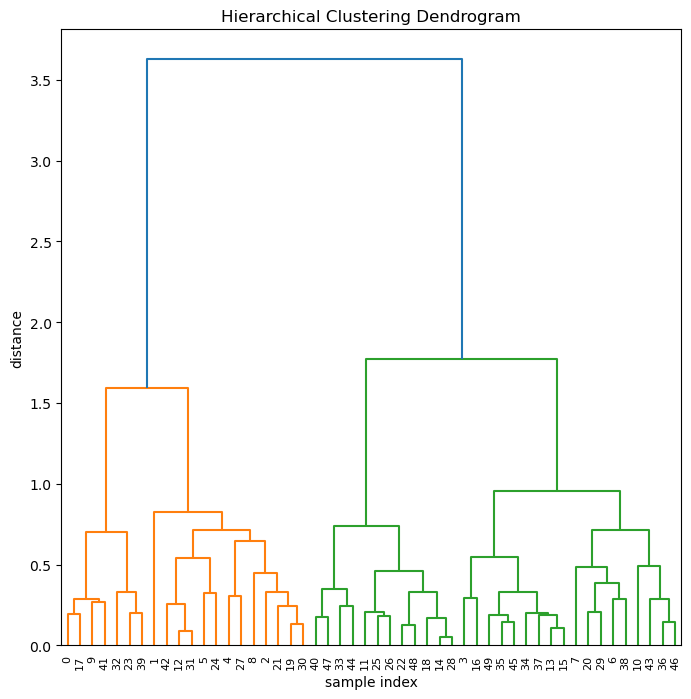

In [17]:
# import dendrogram and linkage from scipy. create linkage object using wards method. display dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_scaled, 'ward') # conventionally we denoate the linkage object as Z
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z);

# The x-axis contains the samples Index and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 2 and cut the dendrogram:

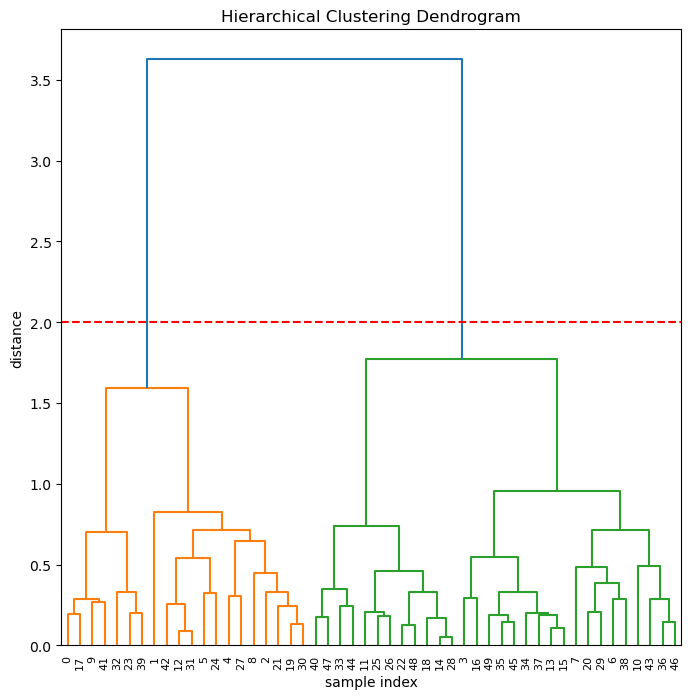

In [20]:
Z = linkage(df_scaled, 'ward') # conventionally we denoate the linkage object as Z
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z);
plt.axhline(y=2, color='r', linestyle='--');

In [21]:
# clustering using AgglomerativeClustering from sklearn and number of clusters = 2
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [22]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_scaled)
labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
# add cluster labels to the dataset
df['cluster_labels'] = labels
df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [24]:
df['cluster_labels'].value_counts()

0    30
1    20
Name: cluster_labels, dtype: int64

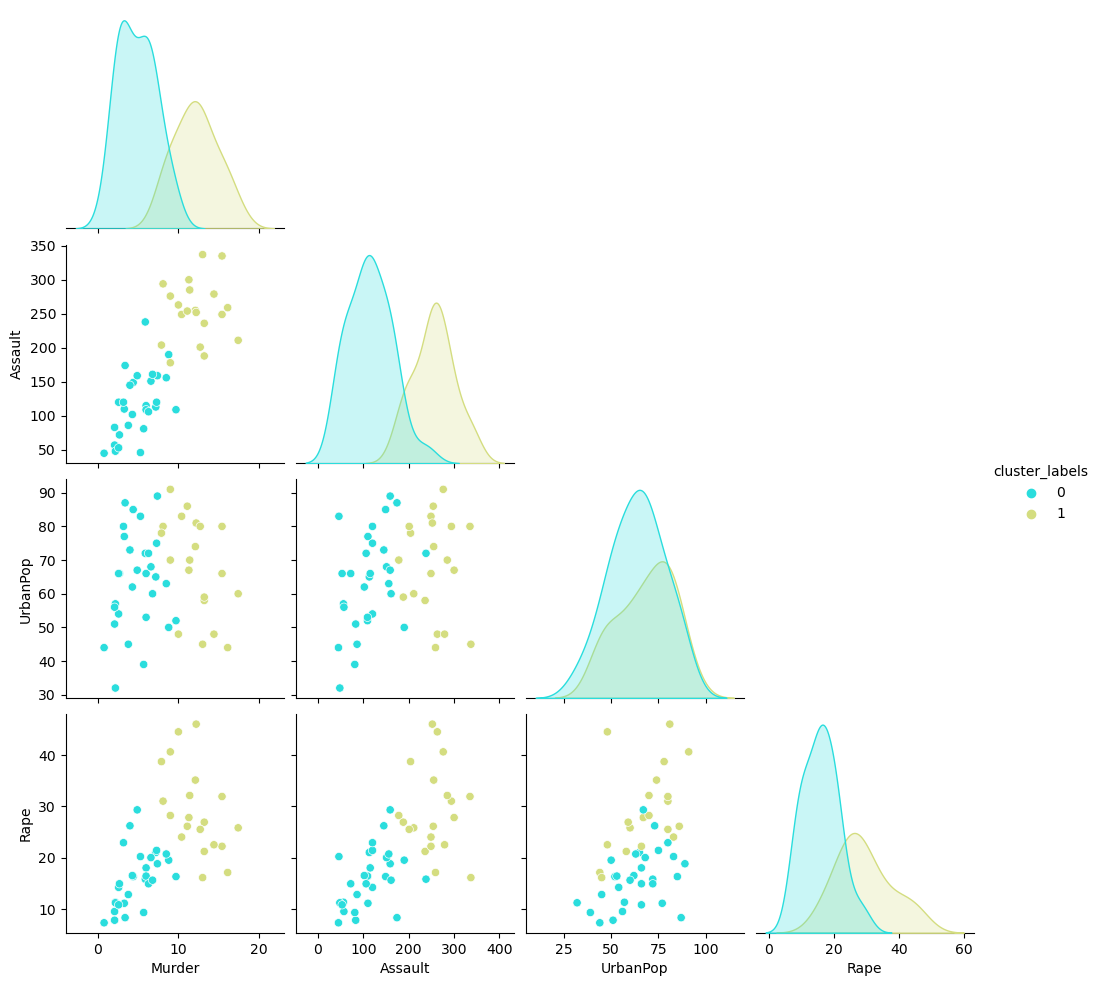

In [25]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df, hue='cluster_labels', palette='rainbow',corner=True,diag_kind='kde');

In [26]:
# generate the cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean().round(0)

,Murder,Assault,UrbanPop,Rape
cluster_labels,,,,
0,5.0,114.0,64.0,16.0
1,12.0,255.0,68.0,29.0


# From the above , We can say that the cities having more urban population are tend to have more Murder,Assault and Rape rate

In [48]:
# Let us try with number of clusters = 3
agglo_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [49]:
# get the cluster labels using fit_predict method of the agglo object
labels_3 = agglo_3.fit_predict(df_scaled)
labels_3

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [50]:
# add cluster labels to the dataset
df['cluster_labels'] = labels_3
df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [51]:
df['cluster_labels'].value_counts()

0    20
1    18
2    12
Name: cluster_labels, dtype: int64

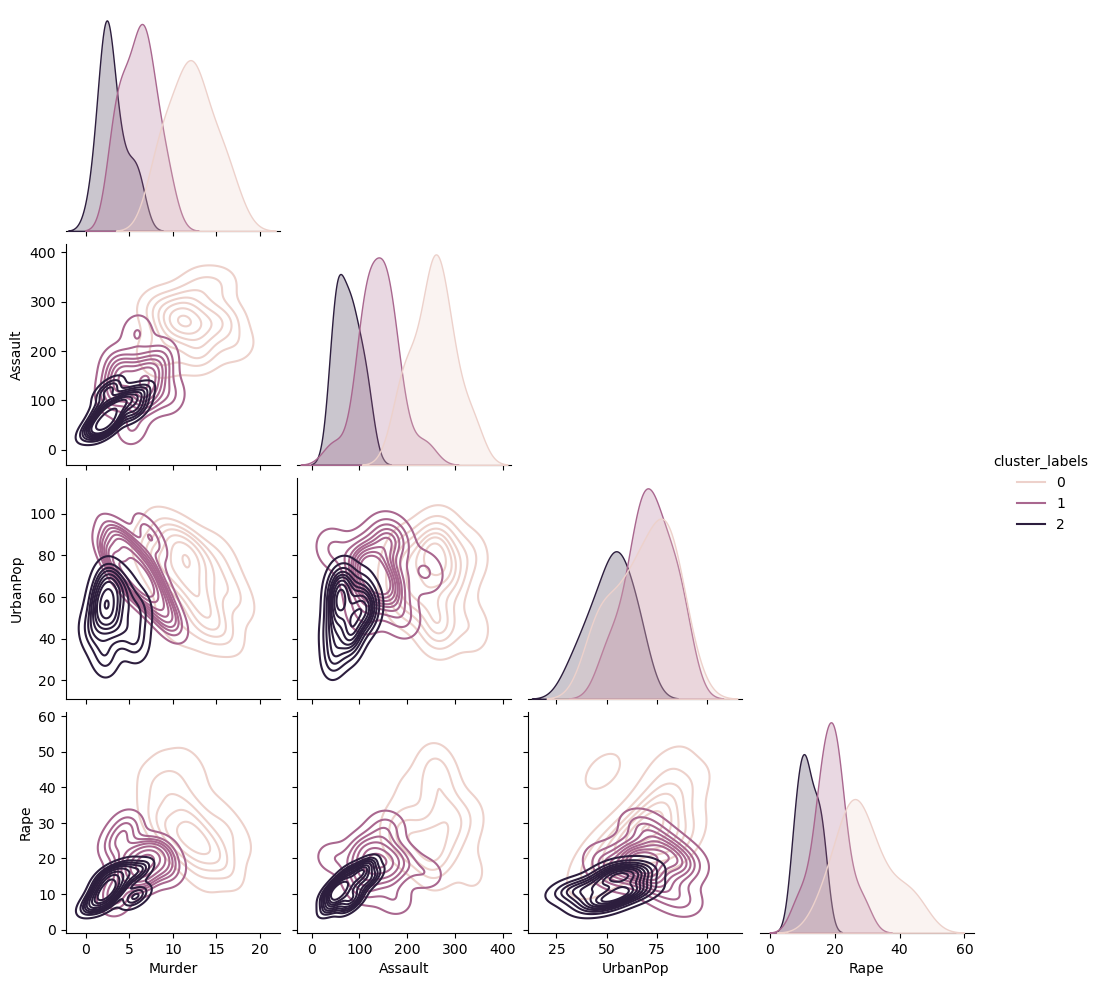

In [52]:
sns.pairplot(data = df, hue = 'cluster_labels',corner = True , kind = 'kde');

In [53]:
df.iloc[:,1:].groupby('cluster_labels').mean().round(2)

,Murder,Assault,UrbanPop,Rape
cluster_labels,,,,
0,12.16,255.25,68.40,29.16
1,6.06,140.06,71.33,18.68
2,3.09,76.00,52.08,11.83


# From 3 clusters , We are not able to clearly state that the urban population is not a criteria for the crime 

#

# DBSCAN CLUSTERING

In [62]:
# load the data set again
df_dbscan = pd.read_csv('crime_data.csv')

In [64]:
# This time scaling tha data with Standard scaler
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_dbscan.iloc[:,1:])
df_scaler = pd.DataFrame(df_scaler, columns=df_dbscan.columns[1:])
df_scaler.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [65]:
df_scaler.describe().round(2)

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,-0.00,0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01
min,-1.62,-1.52,-2.34,-1.50
25%,-0.86,-0.75,-0.77,-0.66
50%,-0.12,-0.14,0.03,-0.12
75%,0.80,0.95,0.85,0.53
max,2.23,2.02,1.78,2.67


# All  Vlues are between -3 and +3 , so standard scaler done

In [66]:
# Instantiate a DBSCAN model object and fit it to the scaled data - take some values for eps and min_samples
# eps = 0.4, min_samples = 2
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(df_scaler)

DBSCAN(eps=0.4, min_samples=2)

In [67]:
# get the labels of the clusters
labels_dbscan = dbscan.labels_
labels_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [96]:
# add the labels to the original dataset as a new feature
df_dbscan['cluster_labels'] = labels_dbscan
df_dbscan.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


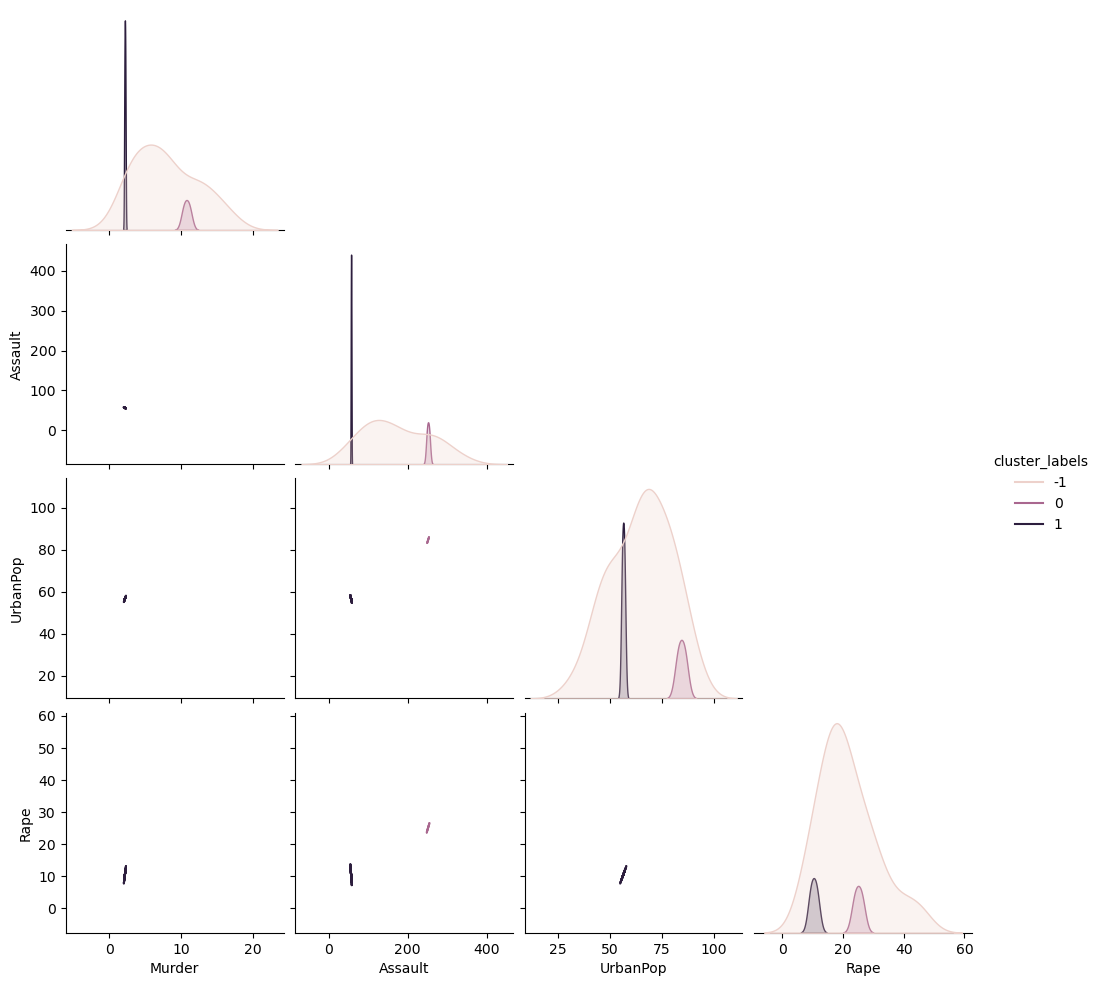

In [97]:
# scatter plot visualisation of DBSCAN CLUSTERING
sns.pairplot(data = df_dbscan.iloc[:,1:], hue = 'cluster_labels',corner = True , kind = 'kde');

In [123]:
df_dbscan.groupby('cluster_labels').mean().round(2)

,Murder,Assault,UrbanPop,Rape
cluster_labels,,,,
-1,7.90,172.22,65.11,21.54
0,10.75,251.50,84.50,25.05
1,2.15,56.50,56.50,10.40


# By taking epsilon value = 0.4 and min_samples = 2 we can make a clear conclusion that the cities having more urban populations are more tend to crime

#

# KMEANS CLUSTERING

In [128]:
# load the data set
df_kmeans = pd.read_csv('crime_data.csv')

In [124]:
# import KMeans & find optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(df_scaler)
    wss.append(km.inertia_)

In [125]:
# wss values
wss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.9971327759971,
 44.19883452022796,
 39.78624099559951,
 36.04698606330911,
 31.78011259796188,
 28.352062841631273]

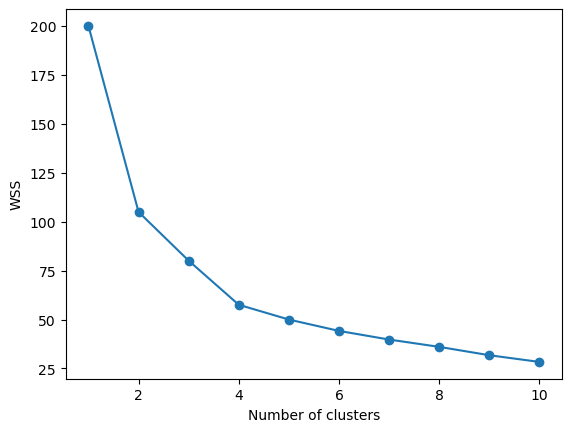

In [126]:
# plot the elbow curve
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS');

# From the above graph the optimum number of clusters = 2

In [127]:
# optimum number of cluster is 2. implement a kmeans clustering modek with k =2 and get the labels
km = KMeans(n_clusters=2,random_state=123)
km.fit(df_scaler)
labels_km = km.labels_
labels_km

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [129]:
df_kmeans['cluster_labels']=labels_km

In [130]:
df_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


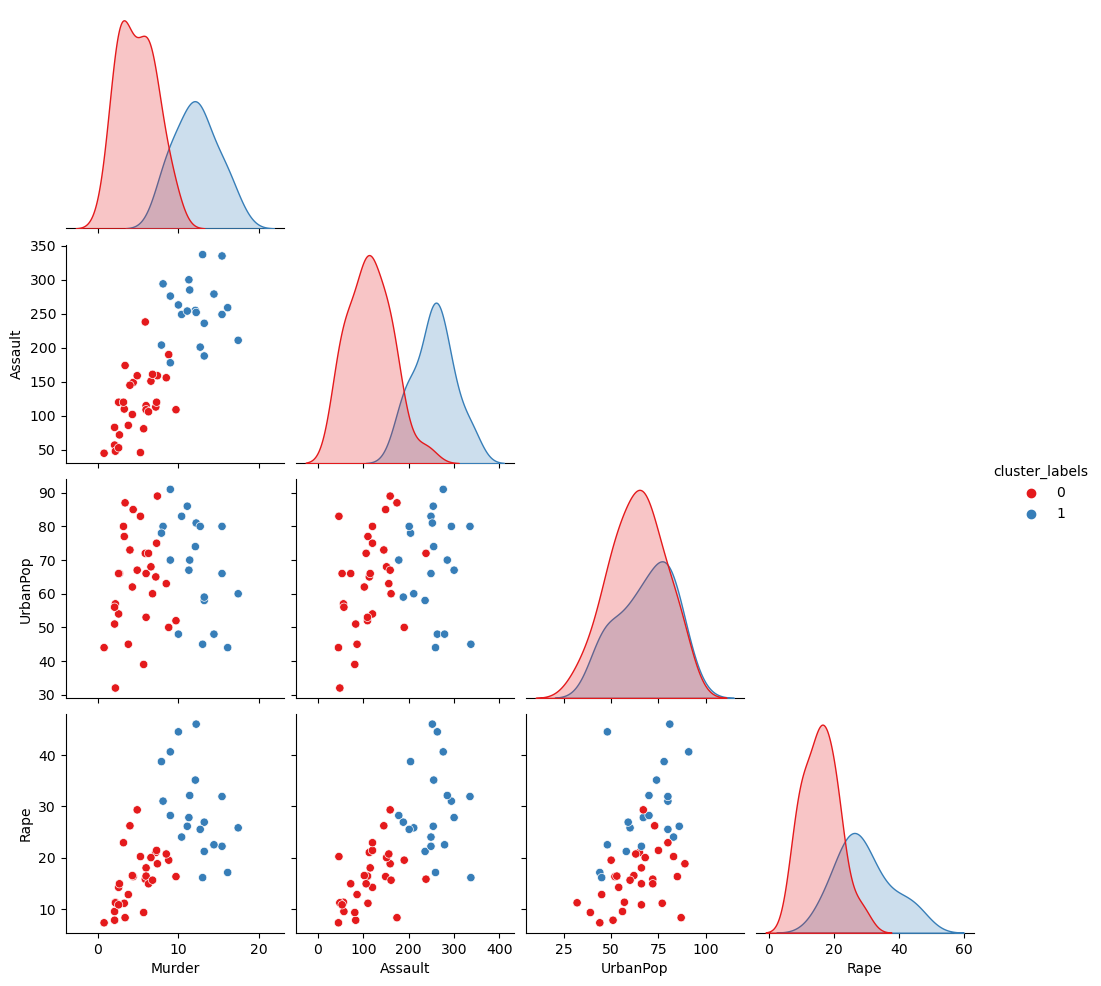

In [131]:
# plot a pairplot with cluster label as hue
sns.pairplot(df_kmeans, hue='cluster_labels', palette='Set1',corner=True, diag_kind='kde');

In [132]:
df_kmeans.groupby('cluster_labels').mean().round(2)

,Murder,Assault,UrbanPop,Rape
cluster_labels,,,,
0,4.87,114.43,63.63,15.94
1,12.16,255.25,68.40,29.16


# From Kmeans clustering we can say that the urban population is the main criteria for the crime

# from the above , we can conclude that the optimum number of clusters can be 2